### Daniel Isaac Ruiz Cruz

### Matrícula: A01652366

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [17]:
dataframe = pd.read_csv("avocado_test.csv")
dataframe = dataframe.drop(['num','Date'],axis=1)
dataframe.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [18]:
dataframe.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [19]:
print(dataframe.groupby('type').size())

type
conventional    9126
organic         9123
dtype: int64


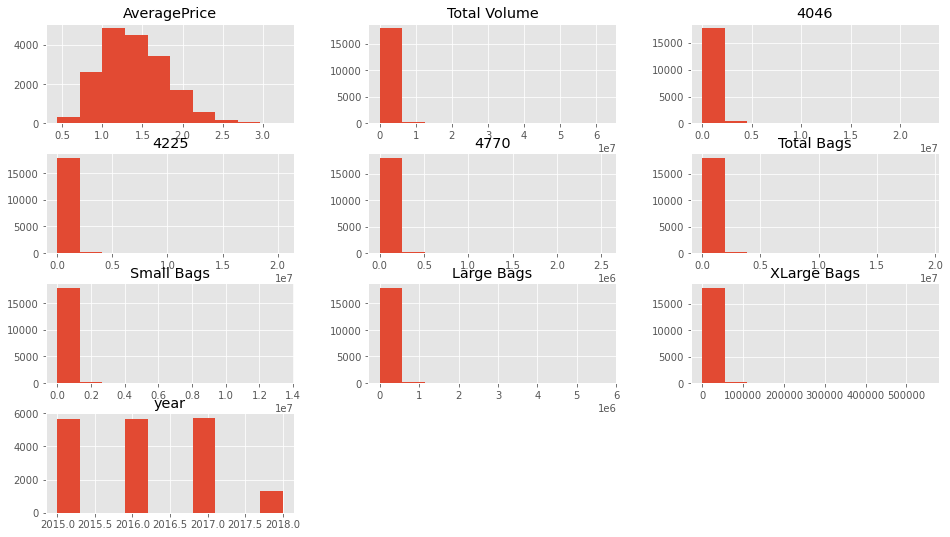

In [20]:
dataframe.drop(['type'],1).hist()
plt.show()

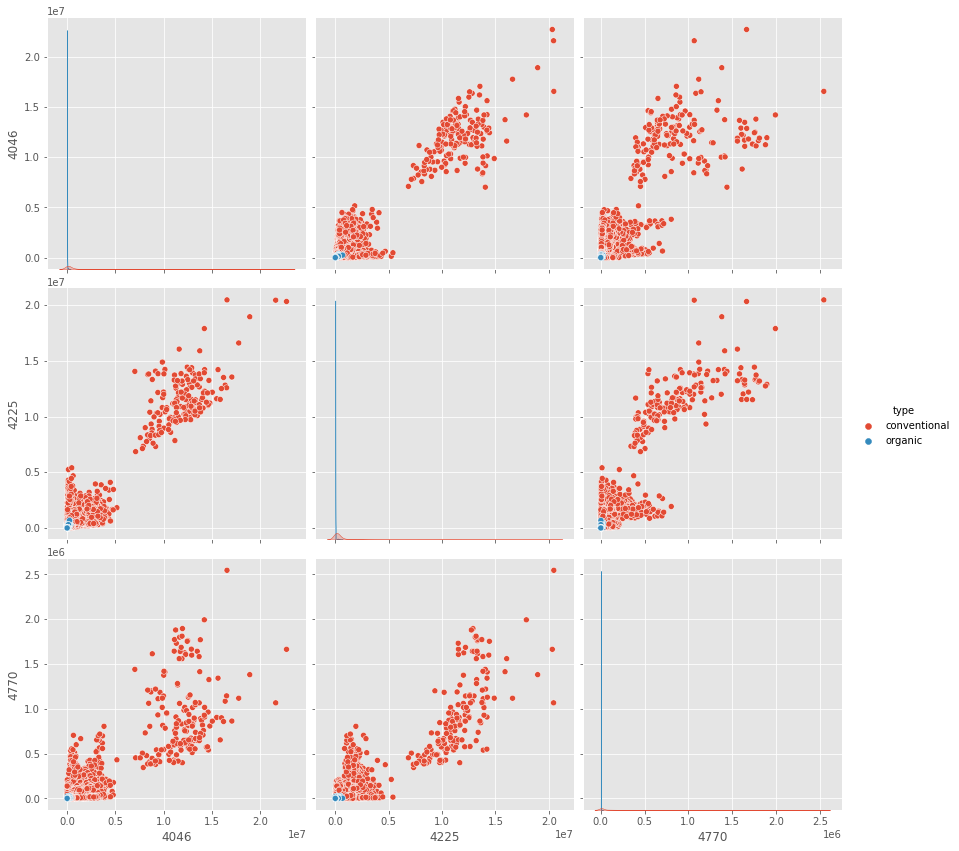

In [21]:
sb.pairplot(dataframe.dropna(), hue='type',height=4,vars=["4046","4225","4770"],kind='scatter')

In [33]:
X = np.array(dataframe[["4046","4225","4770"]])
y = np.array(dataframe['type'])
X.shape
print(y[:50])

['conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional']


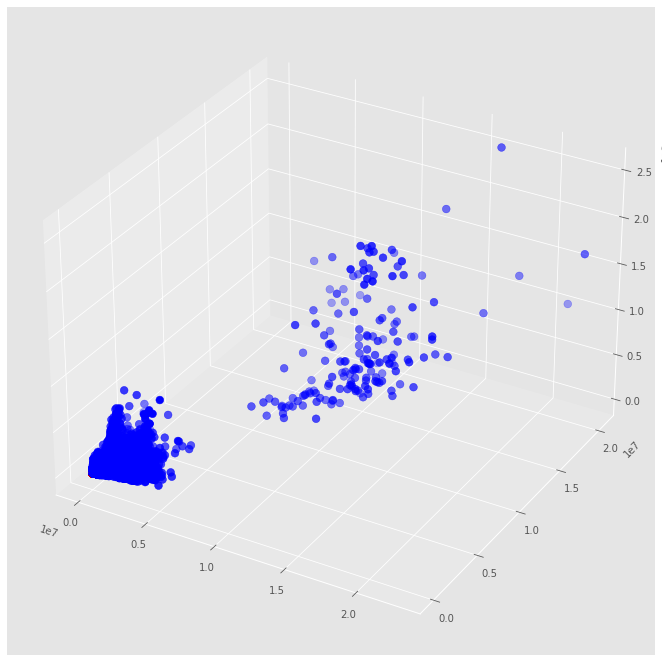

In [37]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red']
asignar=[]
for row in y:
    if(row=='organic'):
        asignar.append(colores[1])
    else:
        asignar.append(colores[0])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

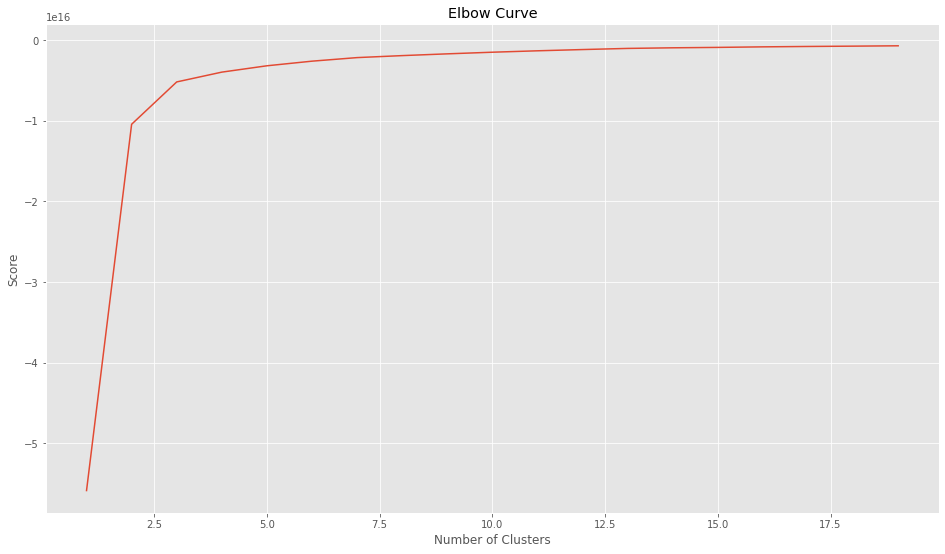

In [38]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[7.65474899e+04 9.13414684e+04 6.51914351e+03]
 [1.20109813e+07 1.16148609e+07 9.18703964e+05]
 [1.65473221e+06 1.53779901e+06 1.23805068e+05]]


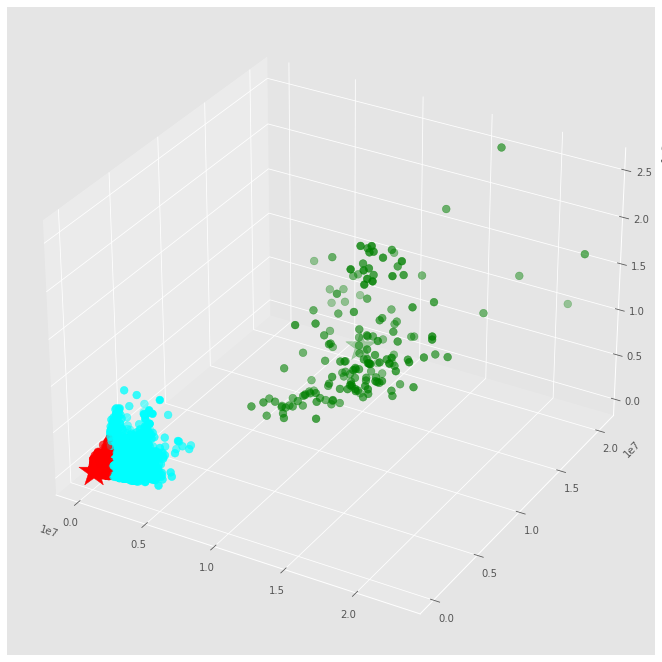

In [46]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

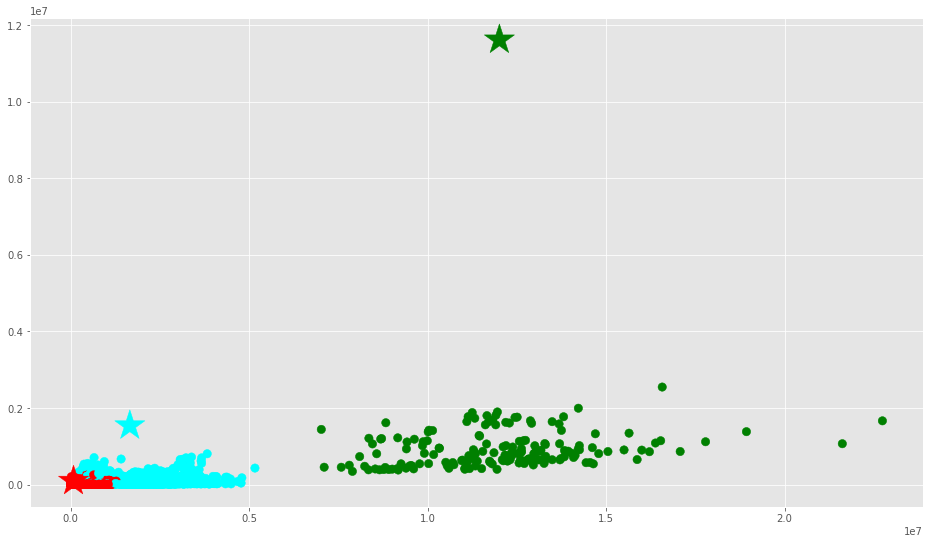

In [47]:
# Getting the values and plotting it
f1 = dataframe["4046"].values
f2 = dataframe["4770"].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

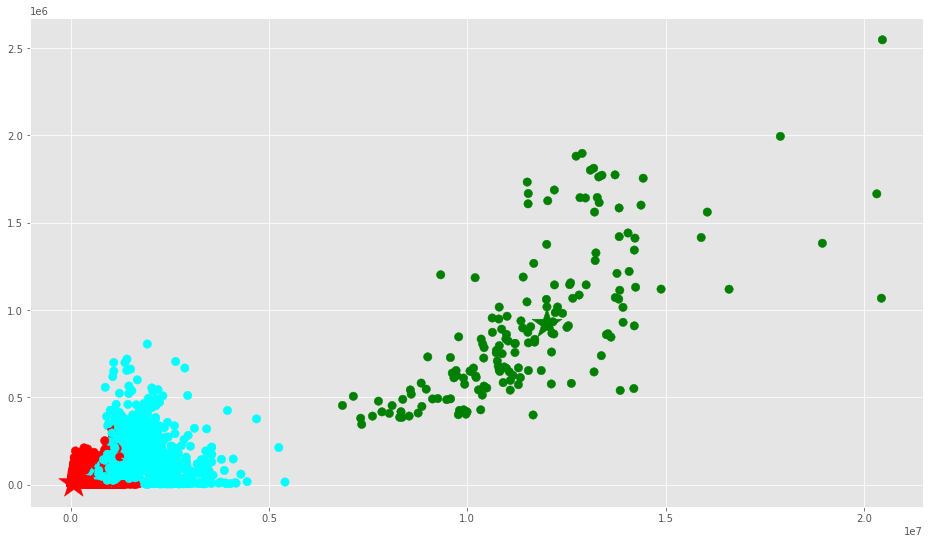

In [48]:
# Getting the values and plotting it
f1 = dataframe["4225"].values
f2 = dataframe["4770"].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

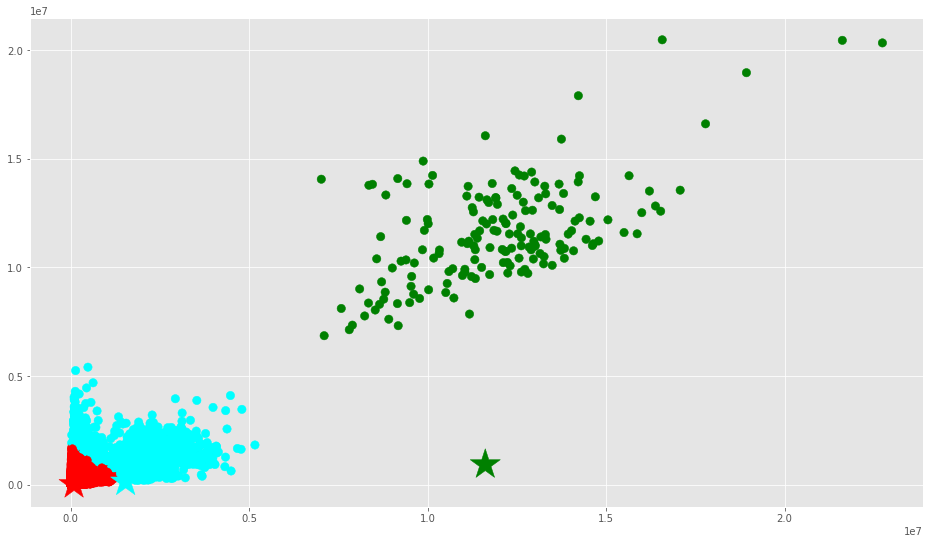

In [49]:
f1 = dataframe["4046"].values
f2 = dataframe["4225"].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [53]:
copy =  pd.DataFrame()
copy['AveragePrice']=dataframe['AveragePrice'].values
copy['type']=dataframe['type'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,16849
1,green,169
2,cyan,1231


In [57]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['type']=['organic','conventional']
diversidadGrupo['cantidad']=group_referrals.groupby('type').size()
diversidadGrupo

,type,cantidad
0,organic,NaN
1,conventional,NaN


In [58]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([8731, 2701, 5974], dtype=int64)

In [60]:
users=dataframe['AveragePrice'].values
for row in closest:
    print(users[row])

1.17
1.03
1.33


In [62]:
X_new = np.array([[505263.29,177911.4,9468.95]]) 

new_labels = kmeans.predict(X_new)
print(new_labels)

[0]


### Conclusiones

- ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

Estos centros solo sirven para relacionar los datos en grupos. No representan ningún valor como media, mediana o moda, únicamente son una herramienta para describir las relaciones que pueden tener debido a su posición. 

- ¿Cómo obtuviste el valor de k a usar?

Al momento de graficar el *Elbow Curve*, se puede notar un punto critico en el cual la grafica se empieza a aplanar. Ese punto es el valor de k que se utilizara para hacer los *clusters*.

- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?

No serian mas significativos, pero si grupos con datos mas cercanos. Esto se debe a que entre más centros haya, por consiguiente, mas datos van a poder estar mas cerca de ellos. Sin embargo, muchos de estos grupos van a ser exactamente iguales, por lo que el análisis se vería afectado por tener grupos repetidos. 
Por otra parte, si es un numero muy bajo de centros los datos van a tener una distancia muy grande entre sí. Esto podría representar un gran problema, puesto que, datos diferentes entre sí podrían estar en el mismo *cluster* afectando al análisis final. 

- ¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?

El primer y segundo centro (azul y rojo) se encuentran muy cerca uno del otro, mientras que el tercero (verde) es el que se encuentra mas alejado de ellos. Esto se debe a que en el *cluster* **azul** y **rojo** se encuentran concentrados la mayor cantidad de datos. Por otro lado, se puede inferir que los “Outliers”, que son los datos mas separados del resto, razón por la cual el *cluster* de color **verde** es el mas distanciado. 
¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
Los centros estarían muy distanciados entre sí. Además, se podría observar que las distancias entre datos dentro de los *clusters* seria mayor, provocando que el centro ya no tuviera una distancia equidistante, dentro de lo que cabe, con los datos dentro de su grupo. 

- ¿Qué puedes decir de los datos basándose en los centros?

Se puede inferir que los centros **rojo** y **azul** son los que tienen la mayor densidad de datos, por lo cual, se puede categorizar al centro **verde** como datos poco significativos para un análisis mas profundo. Asimismo, los clusters **rojo** y **azul**, al ser los de mayor densidad, se podrían volver a correr los mismos análisis creando nuevos *clusters* dentro de estos dos para tener una mayor certeza al momento de hacer los grupos.  
